# **ZERO INITIALIZATION USING RELU**

**IMPORT THE LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**LOAD THE DATASET**

In [ ]:
df = pd.read_csv('/content/ushape.csv')

In [ ]:
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


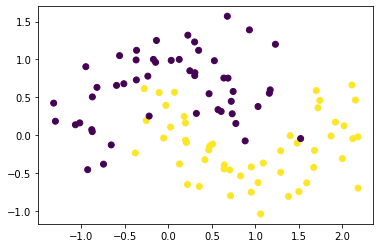

In [ ]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [ ]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(2,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 2)                 6         
                                                                 
 dense_13 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Set parameters to 0
model.get_weights()

[array([[ 0.9283565 ,  0.5740107 ],
        [-0.23292029, -0.09779382]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.46729255],
        [-0.8852598 ]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
initial_weights = model.get_weights()

In [ ]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [ ]:
model.set_weights(initial_weights)

In [ ]:
model.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 97ms/step - loss: 0.8635 - accuracy: 0.5000 - val_loss: 0.8362 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 0.8613 - accuracy: 0.5000 - val_loss: 0.8340 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 0.8590 - accuracy: 0.5000 - val_loss: 0.8319 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 0.8568 - accuracy: 0.5000 - val_loss: 0.8299 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 16ms/step - loss: 0.8547 - accuracy: 0.5000 - val_loss: 0.8278 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 19ms/step - loss: 0.8525 - accuracy: 0.5000 - val_loss: 0.8257 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 24ms/step - loss: 0.8503 - accuracy: 0.5000 - val_loss: 0.8237 - val_accuracy: 0.5000
Epoch 8/100
3/3 [===

In [ ]:
model.get_weights()

[array([[0.7145846, 0.7145846],
        [0.2454365, 0.2454365]], dtype=float32),
 array([0.27247417, 0.27247417], dtype=float32),
 array([[0.26374042],
        [0.26374042]], dtype=float32),
 array([0.24974917], dtype=float32)]

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


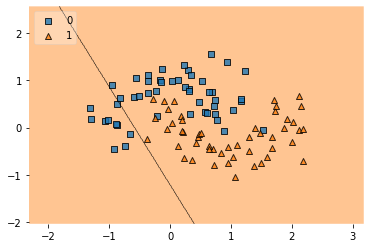

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)